In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from pydataset import data

## Exercises

Do your work for this exercise in a notebook named `modeling` within your `clustering-exercises` repository. For these exercises, YOU ONLY NEED TO DO KMEANS. If you have extra time, then you can play around with DBSCAN.

1. Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.
    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.
2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!
3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

**Bonus**
1. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
2. Visualize the data and guess the number and shape of the clusters.
3. Implement the KMeans algorithm on unscaled data and visualize the clusters.
4. Repeat the step above but with scaled data.
5. Write down the takeaways from this exercise.

In [2]:
df = data('iris')
df.head()

new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


1. Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.


    - Choose features other than the ones used in the lesson.


> used in lesson `X = df[['petal_length', 'petal_width']]`

In [3]:
X = df[['sepal_length','sepal_width']]
X.head()

,sepal_length,sepal_width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


    - Visualize the results of your clustering.


[Text(0.5, 1.0, 'K-Means Clusters')]

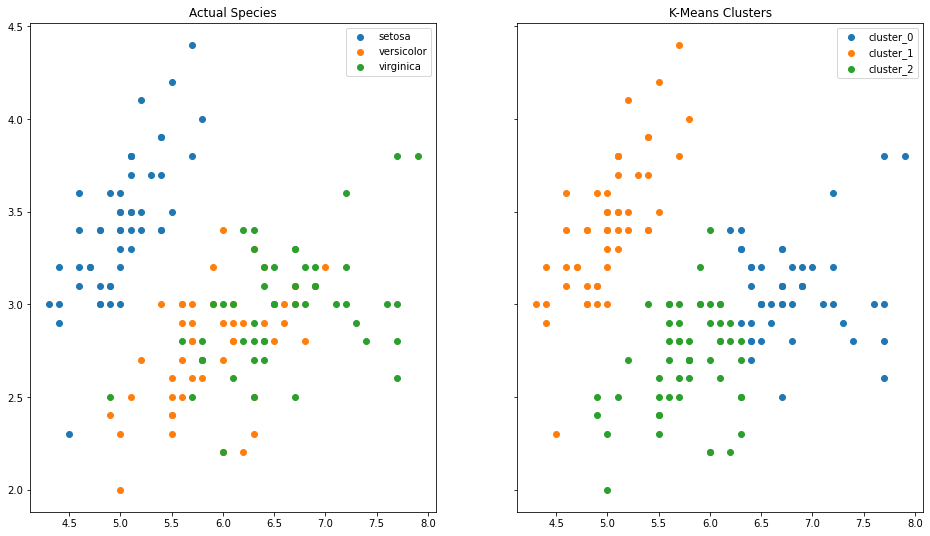

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.sepal_length, subset.sepal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].sepal_length, df[df.cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

    - Use the elbow method to visually select a good value for k.


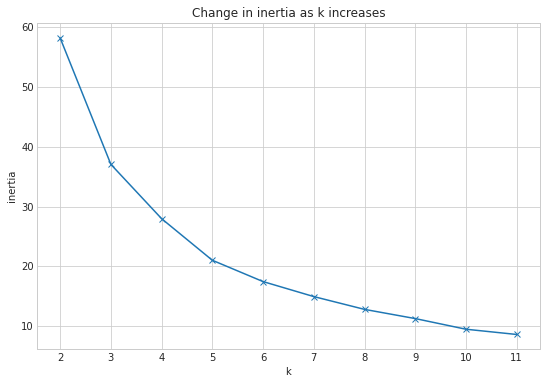

In [6]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

    - Repeat the clustering, this time with 3 different features.


In [7]:
def get_n_colors(n, palette='bright'):
    colors = []
    for i in range(n):
        colors.append(sns.color_palette(palette=palette)[i])
    return colors
colors = get_n_colors(3)
colors

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549)]

In [8]:
cats = df.species.value_counts().index.to_list()

In [12]:
def cat_to_colors(s):
    cats = s.value_counts().index.to_list()
    colors = get_n_colors(len(cats))
    x = s.apply(lambda x: colors[cats.index(x)])
    return x

cat_to_colors(df.species).head()

1    (0.00784313725490196, 0.24313725490196078, 1.0)
2    (0.00784313725490196, 0.24313725490196078, 1.0)
3    (0.00784313725490196, 0.24313725490196078, 1.0)
4    (0.00784313725490196, 0.24313725490196078, 1.0)
5    (0.00784313725490196, 0.24313725490196078, 1.0)
Name: species, dtype: object

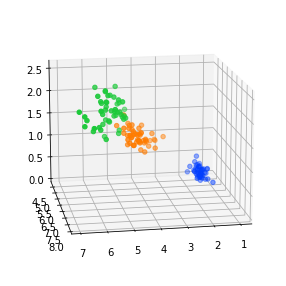

In [13]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection='3d')
ax.scatter3D(data=df, xs='petal_length', ys='sepal_length', zs='petal_width', 
        c=cat_to_colors(df.species)
        )
ax.view_init(15,80)

In [16]:
import plotly.express as px
fig = px.scatter_3d(df, x='petal_length', z='petal_width', y='sepal_length',
              color='species')
fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [14]:
X = df[['petal_length','petal_width','sepal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
df['cluster2'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster2
1,5.1,3.5,1.4,0.2,setosa,1,0
2,4.9,3.0,1.4,0.2,setosa,1,0
3,4.7,3.2,1.3,0.2,setosa,1,0
4,4.6,3.1,1.5,0.2,setosa,1,0
5,5.0,3.6,1.4,0.2,setosa,1,0


In [19]:
fig = px.scatter_3d(df, x='petal_length', z='petal_width', y='sepal_length',
              color='cluster2')
fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.